# Práctica 2  Módulo 4

### Natural Language Processing

Integrantes:


*   Apanco Bernal Alexis Eduardo <<aeabernalinte@gmail.com>>
*   Arredondo G Inda Jesús Antonio <<jesusarredondo0498@gmail.com>>
*   Padilla Santamaria Ismael <<lemasi2396@gmail.com>>





# Insutrucciones

##### 1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Se recomienda el uso de las librerías spacy y [stylecloud](https://github.com/minimaxir/stylecloud). (5pts)

In [ ]:
!pip install stylecloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 262 kB 4.1 MB/s 
     |████████████████████████████████| 161 kB 8.6 MB/s 
     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 87 kB 4.8 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=a43fad705d664b7cf107436d6930c1506defb4a401e2673aed8b7c9e16fe11ea
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=abe9b83531a82056e7c990a5c521c7d6b5fbb91a0452d920d7f29fe3a825d20f
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=a57b6d6a295fefbf922aa52e4bcb4b97988c120966a6d27bf734d2f433ac4d4f
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stylecloud
import seaborn as sns
import os

In [ ]:
"""Importamos el modelo grande de spacy"""
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 9.1 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
from PIL.Image import open as open_wordcloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""Agregamos la ryta en donde esta nuestra base """
path = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/IMDB Dataset.csv"

In [ ]:
"""Observamos lo que contiene nuestro Dataframe"""
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Análisis Exploratorio

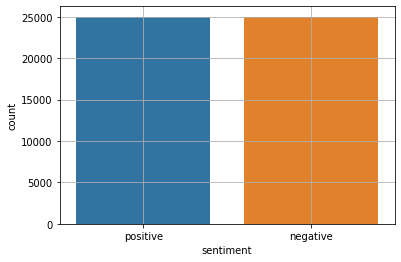

In [ ]:
"""Graficamos nuestra variable objetivo para ver si no existe un desbalance de esta"""
ax = sns.countplot(x='sentiment',data=df)
plt.grid()

In [ ]:
"""Verificamos que nuestros datos no contengan datos vacios"""
df.isnull().sum()

review       0
sentiment    0
dtype: int64

Se puede apreciar que las clases estan balanceadas y no hay datos sin clasificación.

In [ ]:
"""Veamos el primer elemento del dataset"""
doc= nlp(df['review'].iloc[0])
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Veamos el segundo elemento del dataset"""
doc= nlp(df['review'].iloc[1])
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Veamos el tercer elemento del dataset"""
doc= nlp(df['review'].iloc[2])
displacy.render(doc, style='ent', jupyter=True)

Se puede apreciar las distintas estructuras de los comentarios o reseñas de las peliculas y series, donde se resalta la presencia de elementos extraños.

In [ ]:
"""Codificamos la variable objetivo"""
dic_target = {"positive":1,"negative":0}
df_encode = df.copy()
df_encode["sentiment"] = df["sentiment"].map(dic_target)
df_encode["sentiment"].value_counts(dropna=False)

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
"""Separamos los comentarios positivos de los negativo"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

(-0.5, 799.5, 799.5, -0.5)

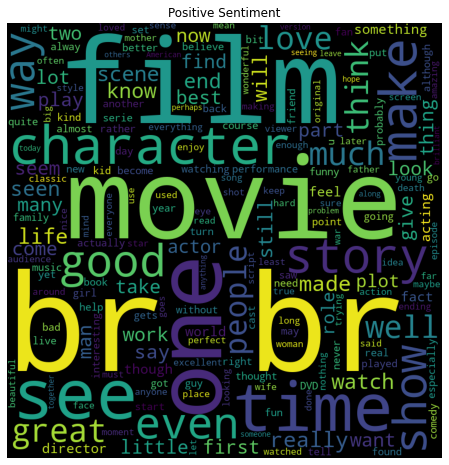

In [ ]:
"""Creación del wordcloud para los comentarios positivos"""
from wordcloud import WordCloud

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

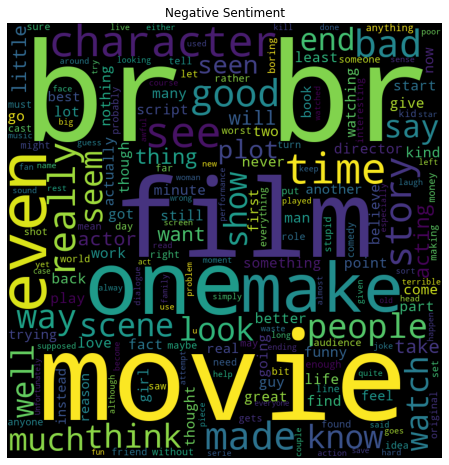

In [ ]:
"""Creación del wordcloud para los comentarios negativos"""
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(neg) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Negative Sentiment')
plt.axis('off')

##### 2.- Con el uso de spacy normalice el texto aplicando las transformaciones que considere necesarias con el objetivo de maximizar el accuracy. (10pts)

Como podemos observar la base de comentarios tiene muchos errores que pueden afectar al momento de desarrollar el modelo. Por lo cual procederemos a realizar una limpieza de la información.

# Tratamiento del Texto

In [ ]:
"""Importamos la paqueteria de puntos para usarla"""
from string import punctuation
punctuation #Simbolos de puntuacion

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
"""Removamos ciertos caracteres especiales encontrados en los comentarios"""
import re
clean_review=re.sub(r"<.*?>", " ", df['review'].iloc[0])

In [ ]:
"""Observamos el primer comentario con la limpieza"""
clean_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.  The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.  It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.  I would say the main appeal of the show is due to the fact that it goes where other sh

Con lo anterior podemos ver como se eliminaron ciertos caracteres que ocasionaban ruido a las oraciones. Al ser esta nuestra segunda itreación, notamos que el simbolo - puede ocasionarnos problemas.

In [ ]:
doc= nlp(clean_review) #Pasamos el comentario por la libreria de spacy
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Creamos una funcion para poder aplicar el proceso a todos los datos"""
def ruido(text):
  clean_review=re.sub(r"<.*?>", " ", text)
  return clean_review

In [ ]:
"""Generalizamos el proceso anterior"""
df_encode["review"]=df_encode["review"].apply(ruido)

In [ ]:
doc= nlp(df_encode["review"][0]) #Observamos el primer comentario
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Separamos los comentarios positivos de los negativo"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

(-0.5, 799.5, 799.5, -0.5)

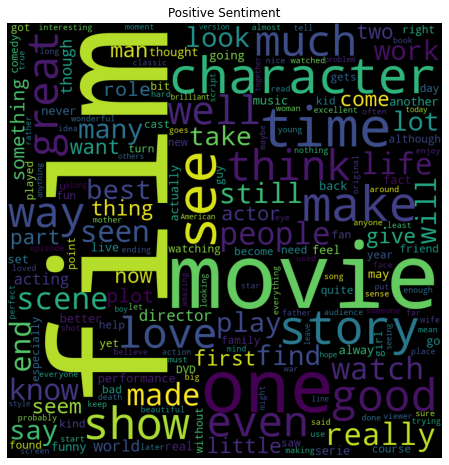

In [ ]:
"""Creación del wordcloud para los comentarios positivos"""

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

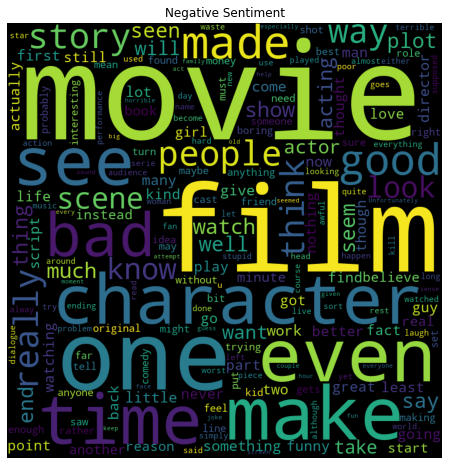

In [ ]:
"""Creación del wordcloud para los comentarios negativos"""
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(neg) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Negative Sentiment')
plt.axis('off')

Podemos apreciar que si bien se eliminaron palabras sin sentido como elementos de html, aún se tiene mucho ruido en la visualizacion. Ahora aplicaremos lematizacion debido que en la iteracion anterior nos percatamos que eliminar simbolos antes afecta a la detección de stopwords.

In [ ]:
"""Asignamos a doc el primer comentario con nlp"""
doc=nlp(df_encode["review"][0])
"""Obtenemos la raiz de cada palabra del primer comentario de la base"""
lemma_text=[word.lemma_ for word in doc] 
print(lemma_text)

['one', 'of', 'the', 'other', 'reviewer', 'have', 'mention', 'that', 'after', 'watch', 'just', '1', 'Oz', 'episode', 'you', 'will', 'be', 'hook', '.', 'they', 'be', 'right', ',', 'as', 'this', 'be', 'exactly', 'what', 'happen', 'with', 'I', '.', ' ', 'the', 'first', 'thing', 'that', 'strike', 'I', 'about', 'Oz', 'be', 'its', 'brutality', 'and', 'unflinche', 'scene', 'of', 'violence', ',', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', '.', 'trust', 'I', ',', 'this', 'be', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', '.', 'this', 'show', 'pull', 'no', 'punch', 'with', 'regard', 'to', 'drug', ',', 'sex', 'or', 'violence', '.', 'its', 'be', 'hardcore', ',', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', '.', ' ', 'it', 'be', 'call', 'OZ', 'as', 'that', 'be', 'the', 'nickname', 'give', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', '.', 'it', 'focus', 'mainly', 'on', 'Emerald', 'City', ',', 'an', 'experimental', 'section', 'o

In [ ]:
"""Lo hacemos el anterior paso función"""
def lematizacion(text):
    doc=nlp(text)
    word_text=[word.lemma_ for word in doc]
    
    cleaned_text=" ".join(word_text)
    return cleaned_text 

In [ ]:
"""Aplicamos la funcion anterior a toda nuestra base"""
df_encode["review"]=df_encode["review"].apply(lematizacion)
doc= nlp(df_encode["review"][0])
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Separamos los comentarios positivos de los negativo"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

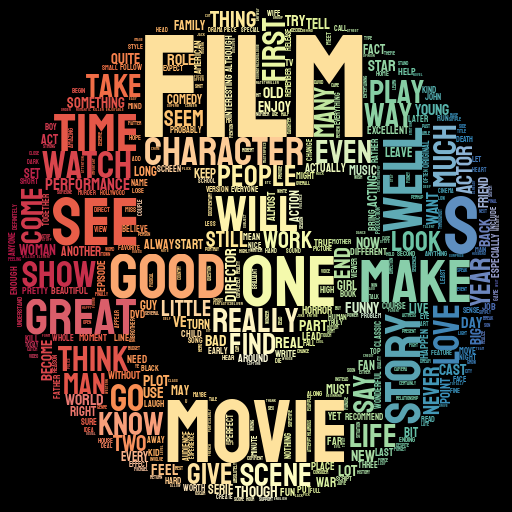

In [ ]:
"""Creación del wordcloud para los comentarios positivos"""
stylecloud.gen_stylecloud(text=pos,
                          collocations=False,
                          icon_name='fas fa-smile',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='pos.png')
open_wordcloud('pos.png')

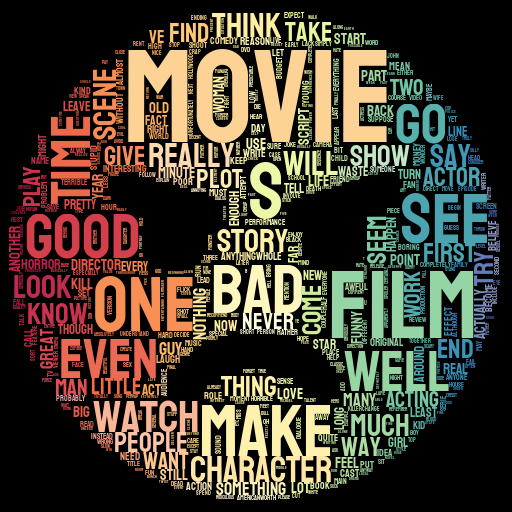

In [ ]:
"""Creación del wordcloud para los comentarios Negativos"""
stylecloud.gen_stylecloud(text=neg,
                          collocations=False,
                          icon_name='fas fa-angry',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='neg.png')
open_wordcloud('neg.png')

In [ ]:
"""Guardamos la data lematizada y limpia"""
df_encode.to_csv("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Data_tratada.csv",
                  index=False, encoding="utf-8")

Ya que lematicemos ahora si eliminaremos simbolos que nos puedan causar ruido.

In [ ]:
"""Creamos una funcion para eliminar los signos de puntución"""
def puntuaciones(text):
  clean_review = " ".join(text.split())
  clean_review = re.sub(f"[{re.escape(punctuation)}]", "", clean_review)
  return clean_review

In [ ]:
"""Procedamos por eliminar los signos de puntuación con la funcion creada"""
df_encode["review"]=df_encode["review"].apply(puntuaciones)
doc= nlp(df_encode["review"][0])
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Separamos los comentarios positivos de los negativo"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

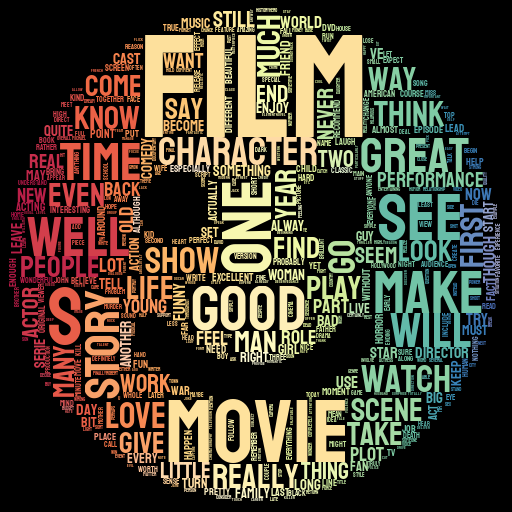

In [ ]:
"""Creación del wordcloud para los comentarios positivos"""
stylecloud.gen_stylecloud(text=pos,
                          collocations=False,
                          icon_name='fas fa-smile',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='pos.png')
open_wordcloud('pos.png')

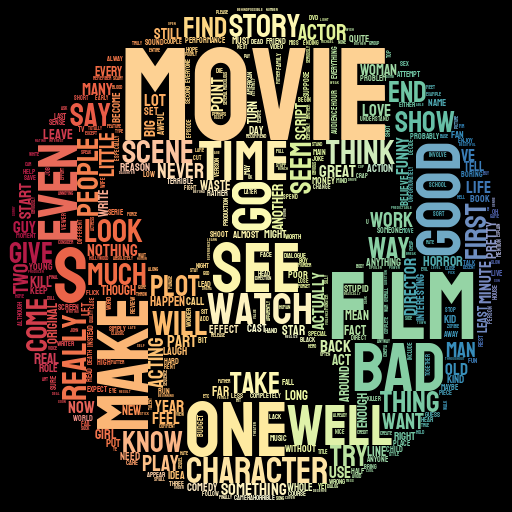

In [ ]:
"""Creación del wordcloud para los comentarios Negativos"""
stylecloud.gen_stylecloud(text=neg,
                          collocations=False,
                          icon_name='fas fa-angry',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='neg.png')
open_wordcloud('neg.png')

Se puede apreciar que si bien se ha eliminado más ruido, aun hay palabras que no aportan nada como lo son las stopwords. De igual modo tenemos que eliminar numeros y porner todas las palabras en minusculas.

In [ ]:
"""Creamos una función para eliminar numeros y convertir las letras en minusculas"""
def minusculas(text):
  clean_text = re.sub(r"\b[0-9]+\b\s*", "", text) #Quitamos los numeros
  clean_text=clean_text.lower() #Volvemos todas las letras a minusculas
  return clean_text

In [ ]:
"""Aplicamos la funcion a todo nuestro dataframe e imprimimos nuestro primer comentario"""
df_encode["review"]=df_encode["review"].apply(minusculas)
doc= nlp(df_encode["review"][0])
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Separamos los comentarios positivos de los negativo"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

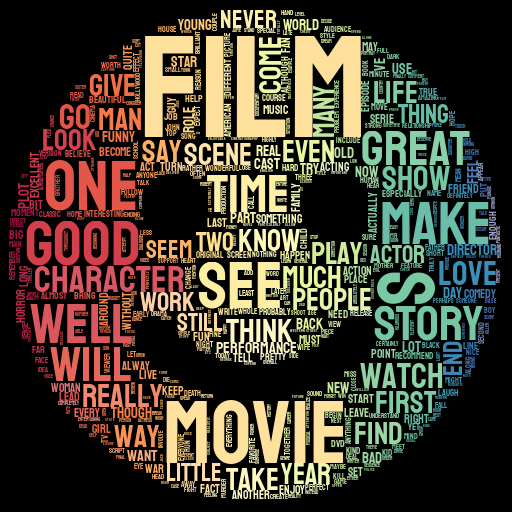

In [ ]:
"""Creación del wordcloud para los comentarios positivos"""
stylecloud.gen_stylecloud(text=pos,
                          collocations=False,
                          icon_name='fas fa-smile',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='pos.png')
open_wordcloud('pos.png')

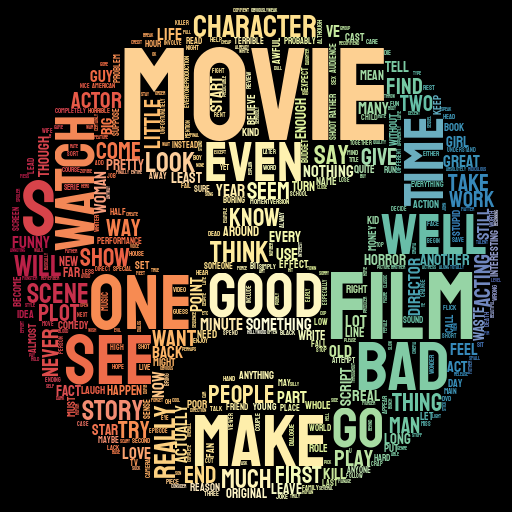

In [ ]:
"""Creación del wordcloud para los comentarios Negativos"""
stylecloud.gen_stylecloud(text=neg,
                          collocations=False,
                          icon_name='fas fa-angry',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='neg.png')
open_wordcloud('neg.png')

Procedamos ahora a eliminar los stopwords.

In [ ]:
"""Guardamos las stepwords en una lista"""
stopwords = nlp.Defaults.stop_words #cargamos el conjunto de stopwords de spacy
len(stopwords)

326

In [ ]:
def remocion_stop(text):
    word_text=text.split() #Separamos las palabras en elementos de una lista
    word_text=[word for word in word_text if word not in stopwords]   #Removemos los stopwords
      
    cleaned_text=" ".join(word_text)
    return cleaned_text 

In [ ]:
df_encode["review"]=df_encode["review"].apply(remocion_stop)
doc= nlp(df_encode["review"][0])
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
"""Separamos los comentarios positivos de los negativo"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

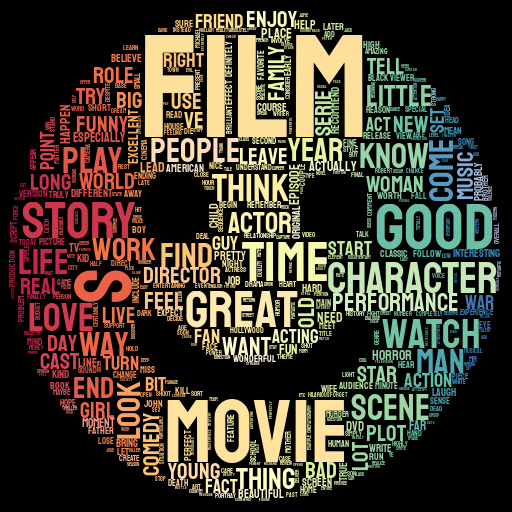

In [ ]:
"""Creación del wordcloud para los comentarios positivos"""
stylecloud.gen_stylecloud(text=pos,
                          collocations=False,
                          icon_name='fas fa-smile',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='pos.png')
open_wordcloud('pos.png')

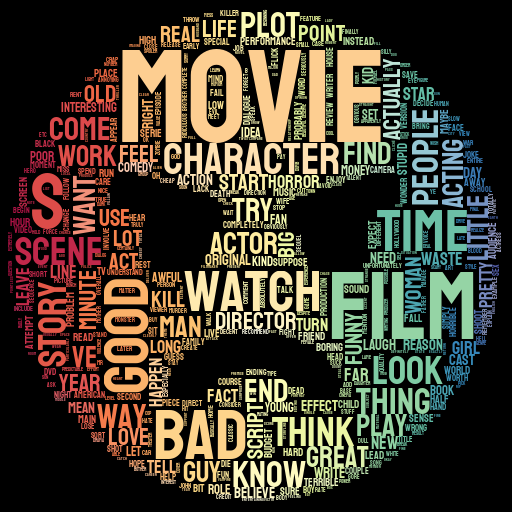

In [ ]:
"""Creación del wordcloud para los comentarios Negativos"""
stylecloud.gen_stylecloud(text=neg,
                          collocations=False,
                          icon_name='fas fa-angry',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='neg.png')
open_wordcloud('neg.png')

In [ ]:
"""Guardamos la data lematizada y limpia"""
df_encode.to_csv("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Data_tratada.csv",
                  index=False, encoding="utf-8")

# Words Embeddings

El siguiente Word Embedding se creo con la base entera y es con el que se creará la visualización en el punto 5.

In [ ]:
"""Cargamos la base ya limpia y sin stopword"""
path = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Data_tratada.csv"
df_encode = pd.read_csv(path)
df_encode.head(2)

,review,sentiment
0,reviewer mention watch oz episode hook right e...,1
1,wonderful little production film technique una...,1


In [ ]:
"""Observamos el primer comentario"""
df_encode["review"][0]

'reviewer mention watch oz episode hook right exactly happen thing strike oz brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word oz nickname oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass face inwards privacy high agenda em city home aryans muslims gangsta latinos christians italians irish scuffle death stare dodgy dealing shady agreement far away main appeal fact dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode strike nasty surreal ready watch develop taste oz accustomed high level graphic violence violence injustice crooked guard sell nickel inmate kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable view touch dark'

In [ ]:
"""Vemos nuestro numero de comentarios por cada sentimiento"""
df_encode["sentiment"].value_counts(dropna=False)

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
"""Separamos por positivos y negativos para saber el numero de apariciones de cada palabra en sus respectivos corpus"""
pos=' '.join(map(str,df_encode.loc[df_encode['sentiment']==1,"review"]))
neg= ' '.join(map(str,df_encode.loc[df_encode['sentiment']==0,"review"]))

In [ ]:
"""Creamos una lista de los comentarios positivos"""
pos_list = list(df_encode.loc[df_encode["sentiment"]==1,"review"])
pos_list[0]

'reviewer mention watch oz episode hook right exactly happen thing strike oz brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word oz nickname oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass face inwards privacy high agenda em city home aryans muslims gangsta latinos christians italians irish scuffle death stare dodgy dealing shady agreement far away main appeal fact dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode strike nasty surreal ready watch develop taste oz accustomed high level graphic violence violence injustice crooked guard sell nickel inmate kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable view touch dark'

In [ ]:
"""Como el corpues total tiene muchas palabras, vamos a tener que sacar muestras de los comentarios positivos y negativo"""

positivos = df_encode.loc[df_encode["sentiment"]==1]
positivos = positivos.sample(frac=0.05, replace=False, random_state=1)
positivos

,review,sentiment
42968,story possibly apocryphal exchange bruce willi...,1
19190,game action adventure combat long period comba...,1
33886,battleship potemkin favourite charlie chaplin ...,1
25214,feeling need play role arbiter public taste po...,1
16671,gilmore girls favorite tv time air season indi...,1
...,...,...
31953,love jones good movie ve experience main eleme...,1
49135,truly wonderfully surprised o brother art thou...,1
46818,got hook apparently abc license pearl tv hong ...,1
38362,paulie sound like saccharine lachrymose sentim...,1


In [ ]:
aux_p = ' '.join(map(str,positivos.loc[df_encode['sentiment']==1,"review"]))
len(aux_p)

859187

In [ ]:
"""Conteo de palabras unicas dentro del corpus"""
"""Positivos"""
len(set(pos.split()))

69960

In [ ]:
"""Negativos"""
len(set(neg.split()))

65947

In [ ]:
"""Obtenemos el tamaño de vocabulario total del corpus entero"""
entero = ' '.join(map(str,df_encode["review"]))
len(set(entero.split()))

98480

In [ ]:
"""Proceso de tokenizacion, preprocesamiento. Para tokenize"""
"""Tamaño del vocabulario, se puede usar con spacy. Cuantas palabras hay"""
vocab_size = len(set(entero.split())) #Convertimos en conjunto para garantiza unicidad y contamos el numero de elementos
"""Hace alución para out of vocabulary (es para las palabras que no se pueden usar). Fuera del vocabulario"""
oov_tok = '<OOV>' 
"""Parecido a las redes neuronales convulucionales, es como crear el borde oscuro."""
padding_type = 'post' 
""" Guardamos los cometarios en una lista"""
comentarios = list(df_encode["review"])

In [ ]:
"""Taño del vocabulario y como nombrar a las palbras que quedarán fuera del vocabulario"""
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
"""Pasamos la data limpia, ya normalizada"""
tokenizer.fit_on_texts(comentarios) 
"""Conteo de palabras"""
tokenizer.word_counts 

In [ ]:
"""numero de palabras que conforman el corpues"""
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size 

98481

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense

In [ ]:
tokenized_reviews = tokenizer.texts_to_sequences(comentarios)
max_length = max([len(x) for x in tokenized_reviews])

In [ ]:
max_length #Tamaño de la secuencia más larga

1252

In [ ]:
padded_reviews = pad_sequences(tokenized_reviews, maxlen=max_length, padding=padding_type)
print(padded_reviews) #Visualizamos los comentarios en secuencias

[[  883   248     9 ...     0     0     0]
 [  236    33   179 ...     0     0     0]
 [   12   236    18 ...     0     0     0]
 ...
 [ 2722  1084 30646 ...     0     0     0]
 [ 2248   673   240 ...     0     0     0]
 [  114    49  1621 ...     0     0     0]]


In [ ]:
labels = np.array(list(df_encode["sentiment"]))
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
"""Creamos la capa de embedding."""
embedding_layer = Embedding(input_dim=vocab_size+1, output_dim=50, input_length=max_length) #Capa nueva
#Dimension de entrada tamaño del vocabulario más un valor adicional para palabras fuera del vocabulario
#output dim determina cuanto va a tardar nuestro algoritmo a ser entrenado, son el numero de variables del vector continuo, buen tamaño 100
#longitud de entrada es la longitud maxima

In [ ]:
"""Modelo para sacar el word embedding"""
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1252, 50)          4924100   
                                                                 
 flatten_3 (Flatten)         (None, 62600)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 62601     
                                                                 
Total params: 4,986,701
Trainable params: 4,986,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(padded_reviews, labels, epochs=30) #Entrenamos el modelo

In [ ]:
print(embedding_layer.get_weights()[0].shape) #Vemos la dimension de nuestra matriz

(98482, 50)


In [ ]:
aux = pd.DataFrame((embedding_layer.get_weights()[0]), index=['<pad>']+list(word_index.keys()), columns=['dim_'+str(x) for x in range(1,51)])
#Vector continuo asociado a las palabras

In [ ]:
"""Guardamos la tabla"""
aux.to_csv("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Matriz_txt.csv",encoding="utf-8")

In [ ]:
aux

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_41,dim_42,dim_43,dim_44,dim_45,dim_46,dim_47,dim_48,dim_49,dim_50
<pad>,0.000801,0.001122,0.000634,0.002262,0.012806,0.000894,-0.005086,0.003034,-0.002645,0.000233,...,0.005047,0.000093,-0.002043,0.000487,-0.001205,0.002252,-0.003512,-0.002520,-0.004267,-0.009468
<OOV>,0.084896,-0.057164,0.059783,-0.068847,0.007843,-0.076694,-0.090414,-0.031008,0.023144,0.049513,...,0.063795,0.033547,-0.051432,0.019722,0.041706,0.038433,-0.068015,-0.076049,0.081646,-0.038061
movie,0.075023,-0.018192,-0.066619,-0.089450,-0.084073,-0.051875,0.016627,0.094947,-0.030233,0.051090,...,-0.163201,-0.053851,-0.066087,-0.017711,-0.204172,0.001332,-0.101335,-0.010235,0.133514,0.027285
film,-0.033244,-0.083008,-0.063554,-0.092944,-0.013491,-0.030643,0.050167,0.046244,-0.122725,-0.041001,...,-0.143827,0.051630,-0.041324,0.113046,-0.004408,0.004444,-0.003660,-0.113409,0.100137,0.221291
s,-0.094104,-0.031042,-0.047783,0.031965,-0.034243,-0.037202,0.005202,-0.017650,-0.075993,0.141716,...,-0.037600,0.014108,-0.010072,-0.142022,-0.035233,-0.042838,-0.037594,-0.112348,-0.010775,0.104192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jossi,-0.044501,0.092479,-0.100513,0.004359,-0.045518,0.039158,0.039947,0.012964,-0.089385,0.003202,...,-0.046545,-0.036110,0.065219,0.048046,0.062457,-0.023060,0.072364,0.106471,-0.049278,-0.006267
ashknenazi,0.010450,0.046611,-0.009610,0.071487,-0.035542,0.021302,0.072383,0.081614,-0.057578,-0.102775,...,-0.027121,-0.044201,0.085861,0.068349,-0.065335,-0.013913,0.027977,0.102041,-0.068473,-0.021232
effortful,0.017039,-0.041107,0.086691,-0.029615,0.088230,-0.034877,-0.076333,-0.022573,0.055597,0.053322,...,0.011010,0.060374,-0.064263,-0.006834,0.031102,0.036760,-0.025520,-0.011238,0.031584,-0.059123
clatter,-0.032614,0.005466,0.026827,0.030565,0.025370,-0.047821,0.002553,-0.047432,-0.001427,0.041967,...,-0.018101,-0.000221,-0.014245,-0.025989,-0.034390,-0.003921,-0.038182,0.031263,-0.016480,0.029719


#Preprocesamiento de los datos

Se contruyo el Embedding para ver la matriz asociado a todos los comentarios ahora separaremos los conjuntos de entrenamiento y validación. Por lo que repetiremos el proceso anterior pero ahora solo para el conjunto de entrenamiento,

In [ ]:
"""Cargamos la base ya limpia y sin stopword"""
path = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Data_tratada.csv"
df_encode = pd.read_csv(path)
df_encode.head(2)

,review,sentiment
0,reviewer mention watch oz episode hook right e...,1
1,wonderful little production film technique una...,1


In [ ]:
"""Observamos el numero de comentarios por cad sentimiento"""
df_encode["sentiment"].value_counts(dropna=False)

1    25000
0    25000
Name: sentiment, dtype: int64

In [ ]:
"""Convertimos los comentarios en un array """
labels = np.array(list(df_encode["sentiment"]))
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""Dividimos la base en entrenamiento y validación"""
X_train,X_val,Y_train,Y_val = train_test_split(df_encode['review'],labels,test_size=0.2,random_state=10)

In [ ]:
"""Vemos lo que contiene nuestro conjunto de entrenamiento"""
X_train

20433    terrible film start title sequence good movie ...
28866    particularly enjoy delly s review film agree h...
42817    crack smoke movie gloriously entertaining awfu...
9543     difficult find positive movie producer need bu...
20619    government fight establish recognize loyalty p...
                               ...                        
40059    film shame orlando florida recognized filmmaki...
28017    having versus previously high hope alive descr...
29199    admit burst laugh reviewer compare lotr yes ex...
40061    find anti war statement look hard layer hackne...
17673    mr seagal apparantly lower low standard outdo ...
Name: review, Length: 40000, dtype: object

In [ ]:
"""Vemos lo que contiene nuestro conjunto de validación"""
X_val

27632    film overwhelming unlikely watch twice lifetim...
36119    fred hammer williamson deliver cheaply movie s...
4796     trailer accepted come people begin excited exc...
3648     buddy entertaining family film set time humani...
24501    think kid movie great deal kid age group think...
                               ...                        
39432    middle aged man robert jordan set way boy scou...
9566     feel movie start acting spot feel character si...
8894     low score possible star shame lobby imdb zero ...
39283    let thing straight bad putrid qualify imprint ...
18187    sea watch original akira kurosawa script lush ...
Name: review, Length: 10000, dtype: object

In [ ]:
"""Observamos la dimensionalidad de nuestro conjunto de entrenamiento"""
X_train.shape

(40000,)

In [ ]:
"""Observamos la dimensionalidad de nuestro conjunto de validación"""
X_val.shape

(10000,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


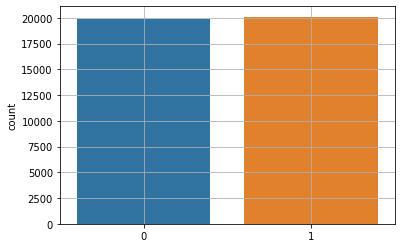

In [ ]:
""""Verificamos que nuestra variable objetivo esta balanceada en nuestro conjunto de entrenamiento"""
ax = sns.countplot(Y_train)
plt.grid()

In [ ]:
"""Realizamos la obtenicion del embedding usando solo el entrenamiento"""
"""Obtenemos el tamaño de vocabulario total del corpus entero"""
entero_entrenamiento = ' '.join(map(str,X_train))
len(set(entero_entrenamiento.split()))

88023

In [ ]:
"""Proceso de tokenizacion, preprocesamiento. Para tokenizar"""
vocab_size = len(set(entero_entrenamiento.split())) #Tamaño del vocabulario, se puede usar con spacy. Cuantas palabras hay
oov_tok = '<OOV>' #Hace alución para out of vocabulary (es para las palabras que no se pueden usar). Fuera del vocabulario
padding_type = 'post' #Parecido a las redes neuronales convulucionales, es como crear el borde oscuro.
comentarios = list(X_train) #Guardamos los cometarios en una lista

In [ ]:
comentarios[:3]

['terrible film start title sequence good movie rat turn monster kill spree acting poor script pointless film scary despite atmospheric music amazing group cobble bag rubbish think good film good film trash urge waste minute life',
 'particularly enjoy delly s review film agree howard damage character howard ruthlessly set script evidence previous employer actually dead murder howard know terror confusion woman lie bolt actually harm helen gordon matter enraged react horror helen s faint spell fact hold pair scissor resume tidying greet recover helen pathetic tired think home frankly think psychopath sick puppy certainly psychopath problem howard real male identity want serve country mental condition deny place army singularly rootless isolated wife girl home far know woman s job floor s speciality helen s niece ruthlessly strip away pride thoroughness exclaim caustically want man real job find strongly attract helen unable unwilling scare strong sexual pass remarkably powerless fight 

In [ ]:
"""Taño del vocabulario y como nombrar a las palbras que quedarán fuera del vocabulario"""
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
"""Pasamos la data limpia, ya normalizada"""
tokenizer.fit_on_texts(comentarios) 
"""#Conteo de palabras"""
tokenizer.word_counts 

In [ ]:
"""numero de palabras que conforman el corpues"""
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size 

88024

In [ ]:
tokenized_reviews = tokenizer.texts_to_sequences(comentarios)
max_length = max([len(x) for x in tokenized_reviews])
max_length

1252

In [ ]:
padded_reviews = pad_sequences(tokenized_reviews, maxlen=max_length, padding=padding_type)

In [ ]:
"""Creamos la capa de embedding."""
embedding_layer = Embedding(input_dim=vocab_size+1, output_dim=50, input_length=max_length) #Capa nueva
#Dimension de entrada tamaño del vocabulario más un valor adicional para palabras fuera del vocabulario
#output dim determina cuanto va a tardar nuestro algoritmo a ser entrenado, son el numero de variables del vector continuo, buen tamaño 100
#longitud de entrada es la longitud maxima

Vamos a realizar una red full connected sencilla para obtener el vector asociado de embeddings con el entrenamiento

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1252, 50)          4401250   
                                                                 
 flatten (Flatten)           (None, 62600)             0         
                                                                 
 dense (Dense)               (None, 1)                 62601     
                                                                 
Total params: 4,463,851
Trainable params: 4,463,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""Ejecutamos la instruccion para correr el modelo con 20 epocas"""
model.fit(padded_reviews, Y_train, epochs=20)

Epoch 1/20
1250/1250 [==============================] - 10s 5ms/step - loss: 0.3627 - accuracy: 0.8339
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1518 - accuracy: 0.9460
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0550 - accuracy: 0.9859
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0168 - accuracy: 0.9975
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0056 - accuracy: 0.9995
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 8.7029e-04 - accuracy: 1.0000
Epoch 8/20
1250/1250 [==============================] - 6s 5ms/step - loss: 3.9709e-04 - accuracy: 1.0000
Epoch 9/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9124e-04 - accuracy: 1.0000
Epoch 10/20
1250/1250 [==============================] - 6s 5ms/step 

In [ ]:
print(embedding_layer.get_weights()[0].shape)

(88025, 50)


In [ ]:
aux = pd.DataFrame((embedding_layer.get_weights()[0]), index=['<pad>']+list(word_index.keys()), columns=['dim_'+str(x) for x in range(1,51)])
aux.to_csv("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Matriz_train_txt.csv",encoding="utf-8")

In [ ]:
"""Matriz asociada solo al conjunto de entrenamiento"""
aux = pd.DataFrame((embedding_layer.get_weights()[0]), index=['<pad>']+list(word_index.keys()), columns=['dim_'+str(x) for x in range(1,51)])
aux

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_41,dim_42,dim_43,dim_44,dim_45,dim_46,dim_47,dim_48,dim_49,dim_50
<pad>,0.002635,-0.000823,0.000585,0.000114,-0.001102,-0.002770,0.001088,-0.001814,0.006220,-0.000471,...,-0.007115,-0.000138,0.000947,0.000603,-0.001702,0.003235,0.000879,0.002406,0.000336,0.008455
<OOV>,0.163414,-0.220763,0.222059,-0.178094,-0.179290,-0.194031,-0.169534,-0.142802,0.207317,0.200520,...,-0.111089,-0.167253,0.166851,0.227819,-0.032119,0.136023,0.164063,0.216402,0.169251,-0.199930
movie,0.005585,0.102272,0.022190,-0.063676,0.016874,-0.096607,-0.138873,-0.024107,-0.007696,-0.028780,...,0.066892,0.028588,0.075842,0.104906,0.101707,0.059613,0.048370,0.049845,-0.027106,-0.009293
film,-0.020853,0.014525,-0.042166,0.056183,0.082101,0.006423,0.098359,-0.032790,-0.009492,-0.037467,...,0.042728,-0.004234,0.063649,0.003244,-0.066982,0.024777,0.116514,0.087568,0.050773,-0.197980
s,0.089346,0.147990,-0.113227,0.017947,0.016790,-0.142584,0.009431,0.055849,0.044190,-0.029696,...,-0.111774,0.007080,-0.054397,0.101795,0.056285,0.110050,0.140145,0.082596,-0.007596,0.040518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
recognized,0.044653,0.070410,0.042039,-0.067356,-0.105483,-0.110095,0.057435,-0.066646,0.113183,0.005718,...,-0.039191,-0.049136,0.066634,0.117777,-0.126810,0.024589,0.085080,0.038046,0.061676,-0.001332
prominance,0.092380,-0.042825,0.045674,-0.042335,-0.053084,-0.061333,0.088437,-0.113506,0.083092,0.129451,...,-0.057603,-0.029146,0.018190,0.074871,-0.082176,0.068902,0.030331,-0.019228,0.036808,-0.013935
prominant,0.083652,-0.050130,0.034162,-0.023190,-0.067460,-0.013076,0.094777,-0.059965,0.102891,-0.087044,...,-0.060818,-0.068904,0.086757,0.080891,-0.078160,0.110206,0.057090,-0.062553,0.100699,0.028714
looonnnggg,0.006352,-0.013304,-0.005070,0.020405,-0.011493,0.013755,-0.004055,0.017425,0.007046,0.027802,...,0.019261,-0.019219,0.009291,0.036450,-0.007399,0.012196,0.027203,-0.017151,0.034572,0.003894


#### 3.- Defina 3 arquitecturas basadas en redes neuronales recurrentes con el uso de Tensorflow. El diseño debe considerar el uso de capas RNN, LSTM, GRU o Bidireccionales. Se recomienda iniciar el desarrollo con una muestra del conjunto de datos. (5pts)


# Modelación
Por terminos de eficiencia realizaremos muestras del 40% del data set original para que los tiempos de entrenamiento sean más agiles y una vez que se obtenga una arquitectura que de buenos reultado. Se evaluara con el data set entero.

In [ ]:
sample_train = pd.DataFrame({"review":list(X_train),"sentiment":list(Y_train)})
sample_train

,review,sentiment
0,terrible film start title sequence good movie ...,0
1,particularly enjoy delly s review film agree h...,1
2,crack smoke movie gloriously entertaining awfu...,0
3,difficult find positive movie producer need bu...,0
4,government fight establish recognize loyalty p...,1
...,...,...
39995,film shame orlando florida recognized filmmaki...,0
39996,having versus previously high hope alive descr...,0
39997,admit burst laugh reviewer compare lotr yes ex...,0
39998,find anti war statement look hard layer hackne...,1


In [ ]:
"""Imprimimos el primer comentario de nuestro conjunto de entrenamiento"""
list(X_train)[0]

'terrible film start title sequence good movie rat turn monster kill spree acting poor script pointless film scary despite atmospheric music amazing group cobble bag rubbish think good film good film trash urge waste minute life'

In [ ]:
"""Imprimimos nuestro primer sentimiento de nuestro conunto de entrenamiento"""
list(Y_train)[0]

0

In [ ]:
"""Creamos la muestra del 40% del total de nuestros datos, para probar las distintas arquitecturas"""
sample_train = sample_train.sample(frac=0.4, replace=False, random_state=1)
sample_train

,review,sentiment
3841,think old cartoon bring tear eye purchase casp...,1
12898,writer work home diagnosis murder lunchtime br...,1
15032,plot line sleep bad idea subject matter bit in...,0
36781,jump chance view movie uncut uninterrupted rem...,0
9201,finish watch movie find basically funny rpg ga...,0
...,...,...
34609,uk bear australian helmer alex frayne attentio...,1
32311,know begin family bad line dialogue hear horro...,0
30185,start ok compare film fight club start ridicul...,0
29459,half hearted attempt bring elvis presley moder...,0


In [ ]:
"""Observamos que tan balanceada esta nuestros sentimientos en nuestro conjunto de muestra"""
sample_train["sentiment"].value_counts(1,dropna=False)

0    0.5035
1    0.4965
Name: sentiment, dtype: float64

In [ ]:
"""Creamos nuestros respectivos conjuntos de entrenamiento y validación con nuestra muestra"""
Xs_train = sample_train["review"]
Ys_train = np.array(sample_train["sentiment"])

In [ ]:
"""Verificamos lo que contiene nuestro conjunto de entrenamiento"""
Xs_train

3841     think old cartoon bring tear eye purchase casp...
12898    writer work home diagnosis murder lunchtime br...
15032    plot line sleep bad idea subject matter bit in...
36781    jump chance view movie uncut uninterrupted rem...
9201     finish watch movie find basically funny rpg ga...
                               ...                        
34609    uk bear australian helmer alex frayne attentio...
32311    know begin family bad line dialogue hear horro...
30185    start ok compare film fight club start ridicul...
29459    half hearted attempt bring elvis presley moder...
33294    help think mask rise leslie vernon massively a...
Name: review, Length: 16000, dtype: object

In [ ]:
"""Verificamos que contiene nuestro conjunto de variable objetivo"""
Ys_train

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
"""Sacamos la muestra del conjunto de validacion"""
sample_val = pd.DataFrame({"review":list(X_val),"sentiment":list(Y_val)})
sample_val = sample_val.sample(frac=0.4, replace=False, random_state=1)
sample_val

,review,sentiment
9953,watch movie feel reach end satisfaction feel w...,1
3850,old buddy send japan result genetic research c...,0
4962,walk movie entertain idea couple time time sne...,0
3886,watch dvd movie come excellent commentary trac...,1
5437,spite sterling work support actor intelligent ...,0
...,...,...
9274,pity throw away good idea main idea movie trav...,0
8946,comment far nail right head viewer certain age...,1
7637,okay cheesiness movie actually pretty good mst...,0
6377,like movie think entertaining dramatic questio...,1


In [ ]:
"""Observamos nuestra proporción de nuestra variable objetivo en el conjunto de muestra de validación"""
sample_val["sentiment"].value_counts(1,dropna=False)

0    0.5155
1    0.4845
Name: sentiment, dtype: float64

In [ ]:
"""Creamos nuestras variables de validacion"""
Xs_val = sample_val["review"]
Ys_val = np.array(sample_val["sentiment"])

In [ ]:
Xs_val

9953    watch movie feel reach end satisfaction feel w...
3850    old buddy send japan result genetic research c...
4962    walk movie entertain idea couple time time sne...
3886    watch dvd movie come excellent commentary trac...
5437    spite sterling work support actor intelligent ...
                              ...                        
9274    pity throw away good idea main idea movie trav...
8946    comment far nail right head viewer certain age...
7637    okay cheesiness movie actually pretty good mst...
6377    like movie think entertaining dramatic questio...
5519    director production company s friend relation ...
Name: review, Length: 4000, dtype: object

In [ ]:
Ys_val[0]

1

In [ ]:
"""Ya que tenemos la muestra tokenizamos"""
"""Realizamos la obtenicion del embedding usando solo el entrenamiento"""
"""Obtenemos el tamaño de vocabulario total del corpus entero"""
entero_entrenamiento = ' '.join(map(str,Xs_train))
vocab_size = len(set(entero_entrenamiento.split())) #Tamaño del vocabulario, se puede usar con spacy. Cuantas palabras hay
oov_tok = '<OOV>' #Hace alución para out of vocabulary (es para las palabras que no se pueden usar). Fuera del vocabulario
padding_type = 'post' #Parecido a las redes neuronales convulucionales, es como crear el borde oscuro.
comentarios = list(Xs_train) #Guardamos los cometarios en una lista

In [ ]:
comentarios[:3]

['think old cartoon bring tear eye purchase casper friends spooking africa want casper cartoon entitle friendly ghost cartoon good boos night break believe sad tragic casper s fox kill like casper cartoon sad depressing watch like lassie die end movie know classic old cartoon fan handle like want watch old classic watch happy funny think casper cartoon think cat',
 'writer work home diagnosis murder lunchtime break companion good clean fun good humour nostalgia day dick van dyke innocent innocent diagnosis murder particularly enjoy episode nostalgia figure like joe mannix bad guy catch good guy carry star clearly enjoy ball seriously beef villain woman bitch amanda dizzy hard imagine carry gruesome autopsy hope dick van dyke family screen esp lunchtime',
 'plot line sleep bad idea subject matter bit interest watch film aloud filmmaker trouble find good location lighting good makeup hair good sound bad film sound echoy garbled dialog unintelligible good acting film think jim thalman goo

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #Taño del vocabulario y como nombrar a las palbras que quedarán fuera del vocabulario
tokenizer.fit_on_texts(comentarios) #Pasamos la data limpia, ya normalizada
word_index = tokenizer.word_index
vocab_size = len(word_index)
tokenized_reviews = tokenizer.texts_to_sequences(comentarios)
max_length = max([len(x) for x in tokenized_reviews])
max_length

935

In [ ]:
padded_reviews = pad_sequences(tokenized_reviews, maxlen=max_length, padding=padding_type)
embedding_layer = Embedding(input_dim=vocab_size+1, output_dim=50, input_length=max_length)

In [ ]:
"""Creamos el padded de los comentarios de validación"""
# Se definen comentarios adicionales sobre los que se requiere predecir
new_reviews  = list(Xs_val)

# Se convierten a una secuencias
sequences = tokenizer.texts_to_sequences(new_reviews)

# Se rellenan las secuencias
new_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type)
new_padded

array([[   9,    2,   34, ...,    0,    0,    0],
       [  35, 1077,  519, ...,    0,    0,    0],
       [ 322,    2,  792, ...,    0,    0,    0],
       ...,
       [ 524, 7206,    2, ...,    0,    0,    0],
       [   5,    2,   12, ...,    0,    0,    0],
       [  36,  183,  721, ...,    0,    0,    0]], dtype=int32)

In [ ]:
new_padded.shape

(4000, 935)

Creamos la capa de embeddings

In [ ]:
"""Se crea el modelo para obtener el word embedding para la muestra del conjunto de entrenamiento"""
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(padded_reviews, Ys_train, epochs=20)

Epoch 1/20
500/500 [==============================] - 3s 4ms/step - loss: 0.4693 - accuracy: 0.7704
Epoch 2/20
500/500 [==============================] - 2s 4ms/step - loss: 0.1736 - accuracy: 0.9396
Epoch 3/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9847
Epoch 4/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0241 - accuracy: 0.9975
Epoch 5/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0100 - accuracy: 0.9994
Epoch 6/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.9999
Epoch 7/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/20
500/500 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/20
500/500 [==============================] - 2s 4ms/step - loss: 7.9384e-04 - accuracy: 1.

In [ ]:
print(embedding_layer.get_weights()[0].shape)

(56411, 50)


## Primera Arquitectura

In [ ]:
from tensorflow.keras.layers import SimpleRNN

In [ ]:
"""Arquitectura basada en una RNN"""
model_rnn = Sequential()
model_rnn.add(embedding_layer)
model_rnn.add(SimpleRNN(units=80,activation = "relu"))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_rnn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 935, 50)           2820550   
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 80)                10480     
                                                                 
 dense_10 (Dense)            (None, 1)                 81        
                                                                 
Total params: 2,831,111
Trainable params: 2,831,111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_rnn.fit(x=padded_reviews, y=Ys_train, epochs=50, validation_data=(new_padded, Ys_val), verbose=1)

Epoch 1/50
500/500 [==============================] - 146s 290ms/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6928 - val_accuracy: 0.5155
Epoch 2/50
500/500 [==============================] - 146s 291ms/step - loss: 27.0325 - accuracy: 0.5026 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 3/50
500/500 [==============================] - 149s 298ms/step - loss: 0.6932 - accuracy: 0.5036 - val_loss: 0.6930 - val_accuracy: 0.5155
Epoch 4/50
500/500 [==============================] - 146s 291ms/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 5/50
500/500 [==============================] - 146s 292ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 6/50
500/500 [==============================] - 145s 290ms/step - loss: 0.6931 - accuracy: 0.5036 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 7/50
500/500 [==============================] - 145s 291ms/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6931 

In [ ]:
"""Guardamos nuestras predicciones"""
predictions = model_rnn.predict(new_padded)
predictions

array([[0.49485326],
       [0.49485326],
       [0.49485326],
       ...,
       [0.49485326],
       [0.49485326],
       [0.49485326]], dtype=float32)

In [ ]:
"""Seleccionamos las que esten por arriba del 0.5"""
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


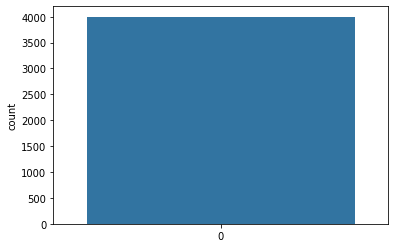

In [ ]:
"""Graficamos"""
sns.countplot(np.where(predictions>0.5, 1, 0).reshape(-1))

In [ ]:
"""Creamos nuestra funcion de metricas y observamos las metricas"""
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
def val(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=predictions,y_true=Ys_val))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=predictions,y_true=Ys_val))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=predictions,y_true=Ys_val))
val()

 Roc Validate: 0.500
 Acc Validate: 0.515
 Matrix Conf Validate:  
 [[2062    0]
 [1938    0]]


In [ ]:
"""Repetimos los pasos de arriba pero ahora con nuestro conjunto de validacion"""
train_val = model_rnn.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)

In [ ]:
train_val

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
"""Creamos nuestra funcion de metricas y los imprimimos"""
def train(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=train_val,y_true=Ys_train))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=train_val,y_true=Ys_train))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=train_val,y_true=Ys_train))
train()

 Roc Validate: 0.500
 Acc Validate: 0.504
 Matrix Conf Validate:  
 [[8056    0]
 [7943    1]]


In [ ]:
"""Mostramos nuetras metricas"""
print(model_rnn.metrics_names)
print(model_rnn.evaluate(new_padded, Ys_val, verbose=0))

['loss', 'accuracy']
[0.6928811073303223, 0.515500009059906]


Podemos apreciar que la primera arquitectura realizada sirve un fuerte problema de sub-ajuste lo cual no no sirve. Por lo que se tendra que diseñar una arquitectura más robusta.

## Segunda Arquitectura

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model_gru = Sequential()
model_gru.add(embedding_layer)
model_gru.add(GRU(units=64, activation = "relu"))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_gru.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 935, 50)           2820550   
                                                                 
 gru_6 (GRU)                 (None, 64)                22272     
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,842,887
Trainable params: 2,842,887
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.fit(x=padded_reviews, y=Ys_train, epochs=25, validation_data=(new_padded, Ys_val), verbose=1)

Epoch 1/25
500/500 [==============================] - 245s 486ms/step - loss: 0.6934 - accuracy: 0.5002 - val_loss: 0.6928 - val_accuracy: 0.5155
Epoch 2/25
500/500 [==============================] - 226s 452ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6930 - val_accuracy: 0.5155
Epoch 3/25
500/500 [==============================] - 262s 524ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6930 - val_accuracy: 0.5155
Epoch 4/25
500/500 [==============================] - 221s 442ms/step - loss: nan - accuracy: 0.5017 - val_loss: nan - val_accuracy: 0.5155
Epoch 5/25
500/500 [==============================] - 220s 440ms/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 6/25
500/500 [==============================] - 218s 435ms/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 7/25
500/500 [==============================] - 220s 439ms/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Ep

KeyboardInterrupt: ignored

Podemos apreciar que se estanco en el entrenamiento y sigue presentando el problema de subajuste por lo cual intentemos meter una red neuronal densa para ver si ayuda un poco a esta configuracion

In [ ]:
model_gru = Sequential()
model_gru.add(embedding_layer)
model_gru.add(Dense(units= 256, activation = "relu"))
model_gru.add(GRU(units=128, activation = "relu"))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 935, 50)           2820550   
                                                                 
 dense_3 (Dense)             (None, 935, 256)          13056     
                                                                 
 gru (GRU)                   (None, 128)               148224    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,981,959
Trainable params: 2,981,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.fit(x=padded_reviews, y=Ys_train, epochs=10, validation_data=(new_padded, Ys_val), verbose=1)

Epoch 1/10
500/500 [==============================] - 826s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 2/10
500/500 [==============================] - 813s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 3/10
500/500 [==============================] - 812s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 4/10
500/500 [==============================] - 813s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 5/10
500/500 [==============================] - 812s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 6/10
500/500 [==============================] - 812s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 7/10
500/500 [==============================] - 813s 2s/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5155
Epoch 8/10
500/500 [=====================

Podemos apreciar que de igual modo se estanco nuestro entrenamiento. Intentemos cambiar las funciones de activación y optimizador.

In [ ]:
"""Arquitectura basada en GRU"""
model_gru = Sequential()
model_gru.add(embedding_layer)
model_gru.add(Dense(units= 256, activation = "tanh")) #Se cambio la funcion de activación
model_gru.add(GRU(units=128, activation = "relu"))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
#Cambiamos el optimizador dado que "rmsprop" tiene una bajada mas rápida que ReLu lo cual nos puede apoyar a salirnos de minimo local.

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 935, 50)           2820550   
                                                                 
 dense_5 (Dense)             (None, 935, 256)          13056     
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,981,959
Trainable params: 2,981,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.fit(x=padded_reviews, y=Ys_train, epochs=10, validation_data=(new_padded, Ys_val), verbose=1)

Epoch 1/10
500/500 [==============================] - 535s 1s/step - loss: 0.6935 - accuracy: 0.4920 - val_loss: 0.6928 - val_accuracy: 0.5155
Epoch 2/10
500/500 [==============================] - 520s 1s/step - loss: 0.6934 - accuracy: 0.4999 - val_loss: 0.6927 - val_accuracy: 0.5155
Epoch 3/10
500/500 [==============================] - 512s 1s/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 0.6947 - val_accuracy: 0.4845
Epoch 4/10
500/500 [==============================] - 516s 1s/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.6930 - val_accuracy: 0.5155
Epoch 5/10
500/500 [==============================] - 528s 1s/step - loss: 0.6934 - accuracy: 0.4969 - val_loss: 0.6928 - val_accuracy: 0.5155
Epoch 6/10
500/500 [==============================] - 520s 1s/step - loss: 0.6933 - accuracy: 0.5046 - val_loss: 0.6953 - val_accuracy: 0.4845
Epoch 7/10
500/500 [==============================] - 517s 1s/step - loss: 0.6934 - accuracy: 0.4950 - val_loss: 0.6927 - val_accuracy: 0.5155

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
def val(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=predictions,y_true=Ys_val))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=predictions,y_true=Ys_val))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=predictions,y_true=Ys_val))

def train(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=train_val,y_true=Ys_train))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=train_val,y_true=Ys_train))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=train_val,y_true=Ys_train))

In [ ]:
"""Observamos las metricas aplicadas al conjunto de validación"""
predictions = model_gru.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.515
 Matrix Conf Validate:  
 [[2062    0]
 [1938    0]]


In [ ]:
"""Observamos las metricas aplicadas al conjunto de entrenamiento"""
train_val = model_gru.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)
train()

 Roc Validate: 0.500
 Acc Validate: 0.504
 Matrix Conf Validate:  
 [[8056    0]
 [7943    1]]


In [ ]:
"""Guardamos los modelos"""
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2"
#model_rnn.save(path_out+"/modelo_rnn.h5")
model_gru.save(path_out+"/modelo_gru.h5")

Podemos ver que si bien los resultados no son los mejores al menos en la funcion de perdida tiene un comportamiento más estable. Pero aun tenemos sub-ajuste lo cual posiblemente se solucione entrenando con toda la base al ingestar mas datos o con una limpieza más exhaustiva

## Tercera Arquirectura

In [ ]:
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense
from tensorflow import keras

In [ ]:
model_lstm= keras.Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(Conv1D(256,10,activation='relu'))
model_lstm.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 935, 50)           2820550   
                                                                 
 conv1d (Conv1D)             (None, 926, 256)          128256    
                                                                 
 bidirectional (Bidirectiona  (None, 926, 256)         394240    
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,425,287
Trainable params: 3,425,287
Non-trainable params: 0
____________________________________________

In [ ]:
model_lstm.fit(x=padded_reviews, y=Ys_train, epochs=10, validation_data=(new_padded, Ys_val), verbose=1)

Epoch 1/10
500/500 [==============================] - 79s 129ms/step - loss: 0.6934 - accuracy: 0.4945 - val_loss: 0.6933 - val_accuracy: 0.4845
Epoch 2/10
500/500 [==============================] - 59s 119ms/step - loss: 0.6933 - accuracy: 0.5021 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 3/10
500/500 [==============================] - 59s 117ms/step - loss: 0.6933 - accuracy: 0.4981 - val_loss: 0.6927 - val_accuracy: 0.5155
Epoch 4/10
500/500 [==============================] - 61s 121ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6932 - val_accuracy: 0.4845
Epoch 5/10
500/500 [==============================] - 59s 119ms/step - loss: 0.6933 - accuracy: 0.5042 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 6/10
500/500 [==============================] - 58s 115ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6929 - val_accuracy: 0.5155
Epoch 7/10
500/500 [==============================] - 58s 117ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6929 - val_ac

In [ ]:
"""Observamos las metricas aplicadas al conjunto de validación"""
predictions = model_lstm.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.515
 Matrix Conf Validate:  
 [[2062    0]
 [1938    0]]


In [ ]:
"""Observamos las metricas aplicadas al conjunto de entrenamiento"""
train_val = model_gru.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)
train()

 Roc Validate: 0.500
 Acc Validate: 0.504
 Matrix Conf Validate:  
 [[8056    0]
 [7943    1]]


In [ ]:
"""Guardamos los modelos"""
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2"
#model_rnn.save(path_out+"/modelo_rnn.h5")
model_lstm.save(path_out+"/modelo_lstm.h5")

Se parecia que tiene el mismo performance que la arquitectura 2 pero su entrenamiento es más agil por lo cual lo consideramos como el modelo ganador.

Ahora usameremos la base completa

## Modelo Ganador

In [ ]:
"""Realizamos la obtenicion del embedding usando solo el entrenamiento"""
"""Obtenemos el tamaño de vocabulario total del corpus entero"""
entero_entrenamiento = ' '.join(map(str,X_train))
"""Proceso de tokenizacion, preprocesamiento. Para tokenizar"""
vocab_size = len(set(entero_entrenamiento.split())) #Tamaño del vocabulario, se puede usar con spacy. Cuantas palabras hay
oov_tok = '<OOV>' #Hace alución para out of vocabulary (es para las palabras que no se pueden usar). Fuera del vocabulario
padding_type = 'post' #Parecido a las redes neuronales convulucionales, es como crear el borde oscuro.
comentarios = list(X_train) #Guardamos los cometarios en una lista
len(comentarios)

40000

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #Taño del vocabulario y como nombrar a las palbras que quedarán fuera del vocabulario
tokenizer.fit_on_texts(comentarios) #Pasamos la data limpia, ya normalizada

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

88024

In [ ]:
tokenized_reviews = tokenizer.texts_to_sequences(comentarios)
max_length = max([len(x) for x in tokenized_reviews])

In [ ]:
padded_reviews = pad_sequences(tokenized_reviews, maxlen=max_length, padding=padding_type)

In [ ]:
"""Creamos la capa de embedding."""
embedding_layer = Embedding(input_dim=vocab_size+1, output_dim=50, input_length=max_length) #Capa nueva

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Creamos el padded de los comentarios de validación"""
# Se definen comentarios adicionales sobre los que se requiere predecir
new_reviews  = list(X_val)

# Se convierten a una secuencias
sequences = tokenizer.texts_to_sequences(new_reviews)

# Se rellenan las secuencias
new_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type)
new_padded

array([[    3,  3464,  2085, ...,     0,     0,     0],
       [ 1968,  2318,  9182, ...,     0,     0,     0],
       [  920, 22412,    21, ...,     0,     0,     0],
       ...,
       [  159,   327,   414, ...,     0,     0,     0],
       [  102,    22,   477, ...,     0,     0,     0],
       [ 1198,     9,    84, ...,     0,     0,     0]], dtype=int32)

In [ ]:
X_train.shape

(40000,)

In [ ]:
padded_reviews.shape

(40000, 1252)

In [ ]:
new_padded.shape

(10000, 1252)

In [ ]:
X_val.shape

(10000,)

In [ ]:
model.fit(padded_reviews, Y_train, epochs=20)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3572 - accuracy: 0.8408
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1513 - accuracy: 0.9457
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0525 - accuracy: 0.9872
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0157 - accuracy: 0.9979
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0053 - accuracy: 0.9996
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0021 - accuracy: 0.9999
Epoch 7/20
1250/1250 [==============================] - 8s 7ms/step - loss: 8.3081e-04 - accuracy: 1.0000
Epoch 8/20
1250/1250 [==============================] - 6s 5ms/step - loss: 3.7116e-04 - accuracy: 1.0000
Epoch 9/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7930e-04 - accuracy: 1.0000
Epoch 10/20
1250/1250 [==============================] - 9s 7ms/step -

In [ ]:
print(embedding_layer.get_weights()[0].shape)

(88025, 50)


In [ ]:
"""Mostramos los parametros del modelo"""
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1252, 50)          4401250   
                                                                 
 flatten_2 (Flatten)         (None, 62600)             0         
                                                                 
 dense_8 (Dense)             (None, 1)                 62601     
                                                                 
Total params: 4,463,851
Trainable params: 4,463,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm= keras.Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(Conv1D(256,10,activation='relu'))
model_lstm.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos los parametros del modelo"""
model_lstm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1252, 50)          4401250   
                                                                 
 conv1d_1 (Conv1D)           (None, 1243, 256)         128256    
                                                                 
 bidirectional_1 (Bidirectio  (None, 1243, 256)        394240    
 nal)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,005,987
Trainable params: 5,005,987
Non-trainable params: 0
____________________________________________

In [ ]:
model_lstm.fit(x=padded_reviews, y=Y_train, epochs=10, validation_data=(new_padded, Y_val), verbose=1) #Entrenamos con toda la porcion de entrenamiento

Epoch 1/10
1250/1250 [==============================] - 227s 177ms/step - loss: 0.6933 - accuracy: 0.4981 - val_loss: 0.6934 - val_accuracy: 0.4892
Epoch 2/10
1250/1250 [==============================] - 196s 157ms/step - loss: 0.6932 - accuracy: 0.5003 - val_loss: 0.6935 - val_accuracy: 0.4892
Epoch 3/10
1250/1250 [==============================] - 197s 158ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.4892
Epoch 4/10
1250/1250 [==============================] - 195s 156ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.4892
Epoch 5/10
1250/1250 [==============================] - 194s 155ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6935 - val_accuracy: 0.4892
Epoch 6/10
1250/1250 [==============================] - 195s 156ms/step - loss: 0.6933 - accuracy: 0.5019 - val_loss: 0.6933 - val_accuracy: 0.4892
Epoch 7/10
1250/1250 [==============================] - 193s 155ms/step - loss: 0.6932 - accuracy: 0.5024 - val_

In [ ]:
def val(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=predictions,y_true=Y_val))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=predictions,y_true=Y_val))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=predictions,y_true=Y_val))

def train(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=train_val,y_true=Y_train))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=train_val,y_true=Y_train))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=train_val,y_true=Y_train))

In [ ]:
"""Observamos las metricas aplicadas al conjunto de validación"""
predictions = model_lstm.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.489
 Matrix Conf Validate:  
 [[   0 5108]
 [   0 4892]]


In [ ]:
"""Observamos las metricas aplicadas al conjunto de entrenamiento""
train_val = model_lstm.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)
train()

 Roc Validate: 0.500
 Acc Validate: 0.503
 Matrix Conf Validate:  
 [[    0 19892]
 [    0 20108]]


Podemos observar que sufrimos un serio problema de sub-ajuste por lo cual una solución posiblemente efectiva es volver a nuestro preprocesamiento

##### 4.- Entrene, optimice y evalúe cada uno de los 3 modelos hasta hallar una arquitectura con resultados aceptables. Utilizando el modelo ganador, diagnostique si el modelo tiene problemas de sobreajuste, subajuste, ambas o ninguna. (5pts)

### Mejorando el modelo ganador

In [ ]:
"""Cargamos el modelo """
path = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Data_tratada.csv"
df_encode = pd.read_csv(path)

In [ ]:
df_encode.head(5)

,review,sentiment
0,reviewer mention watch oz episode hook right e...,1
1,wonderful little production film technique una...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei s love time money visually stunn...,1


In [ ]:
"""Revisamos que no haya datos repetidos"""
df_encode.duplicated().sum()

426

In [ ]:
"""Eliminamos los repetidos"""
df_encode=df_encode.drop_duplicates()
df_encode=df_encode.reset_index(drop=True)

In [ ]:
"""Observamos la dimension"""
df_encode.shape

(49574, 2)

In [ ]:
"""Agregamos a un array nuestra lista de sentimientos"""
labels = np.array(list(df_encode["sentiment"]))
labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""Realizamos la separacion de entrenamiento y validación"""
X_train,X_val,Y_train,Y_val = train_test_split(df_encode['review'],labels,test_size=0.1,random_state=10) #Validamos solo con el 10%

In [ ]:
"""cargamos el conjunto de stopwords de spacy"""
stopwords = nlp.Defaults.stop_words 

In [ ]:
nlp.vocab['a'].is_stop

True

In [ ]:
"""Quitamos stopwords nuevamente de entrenamiento y validacion"""
def remocion_stop(text):
    word_text=text.split() #Separamos las palabras en elementos de una lista
    word_text=[word for word in word_text if word not in stopwords]   #Removemos los stopwords
      
    cleaned_text=" ".join(word_text)
    return cleaned_text

In [ ]:
X_train = X_train.apply(remocion_stop)

In [ ]:
X_train.shape

(44616,)

In [ ]:
X_val = X_val.apply(remocion_stop)

In [ ]:
"""Realizamos la obtenicion del embedding usando solo el entrenamiento"""
"""Obtenemos el tamaño de vocabulario total del corpus entero"""
entero_entrenamiento = ' '.join(map(str,X_train))
"""Proceso de tokenizacion, preprocesamiento. Para tokenizar"""
vocab_size = len(set(entero_entrenamiento.split())) #Tamaño del vocabulario, se puede usar con spacy. Cuantas palabras hay
oov_tok = '<OOV>' #Hace alución para out of vocabulary (es para las palabras que no se pueden usar). Fuera del vocabulario
padding_type = 'post' #Parecido a las redes neuronales convulucionales, es como crear el borde oscuro.
comentarios = list(X_train) #Guardamos los cometarios en una lista
len(comentarios)

44616

In [ ]:
"""Tamaño del vocabulario y como nombrar a las palabras que quedarán fuera del vocabulario"""
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) 
"""Pasamos la data limpia, ya normalizada"""
tokenizer.fit_on_texts(comentarios) 

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

93373

In [ ]:
tokenized_reviews = tokenizer.texts_to_sequences(comentarios)
max_length = max([len(x) for x in tokenized_reviews])

In [ ]:
padded_reviews = pad_sequences(tokenized_reviews, maxlen=max_length, padding=padding_type)

In [ ]:
"""Creamos la capa de embedding."""
embedding_layer = Embedding(input_dim=vocab_size+1, output_dim=50, input_length=max_length) #Capa nueva

In [ ]:
"""Creamos el padded de los comentarios de validación"""
# Se definen comentarios adicionales sobre los que se requiere predecir
new_reviews  = list(X_val)

# Se convierten a una secuencias
sequences = tokenizer.texts_to_sequences(new_reviews)

# Se rellenan las secuencias
new_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type)
new_padded

array([[  642,     2,  2859, ...,     0,     0,     0],
       [  179,  1541,   736, ...,     0,     0,     0],
       [ 4405, 21265,   123, ...,     0,     0,     0],
       ...,
       [    1,  1034,  2931, ...,     0,     0,     0],
       [  547,   759,   870, ...,     0,     0,     0],
       [   36,    19,     2, ...,     0,     0,     0]], dtype=int32)

In [ ]:
padded_reviews.shape

(44616, 1018)

In [ ]:
new_padded.shape

(4958, 1018)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos los parametros del modelo"""
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1018, 50)          4668700   
                                                                 
 flatten (Flatten)           (None, 50900)             0         
                                                                 
 dense (Dense)               (None, 1)                 50901     
                                                                 
Total params: 4,719,601
Trainable params: 4,719,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(padded_reviews, Y_train, epochs=20)

Epoch 1/20
1395/1395 [==============================] - 10s 5ms/step - loss: 0.3515 - accuracy: 0.8427
Epoch 2/20
1395/1395 [==============================] - 7s 5ms/step - loss: 0.1510 - accuracy: 0.9464
Epoch 3/20
1395/1395 [==============================] - 8s 6ms/step - loss: 0.0510 - accuracy: 0.9872
Epoch 4/20
1395/1395 [==============================] - 7s 5ms/step - loss: 0.0143 - accuracy: 0.9979
Epoch 5/20
1395/1395 [==============================] - 7s 5ms/step - loss: 0.0044 - accuracy: 0.9996
Epoch 6/20
1395/1395 [==============================] - 7s 5ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 7/20
1395/1395 [==============================] - 7s 5ms/step - loss: 6.1578e-04 - accuracy: 1.0000
Epoch 8/20
1395/1395 [==============================] - 7s 5ms/step - loss: 2.7250e-04 - accuracy: 1.0000
Epoch 9/20
1395/1395 [==============================] - 7s 5ms/step - loss: 1.2153e-04 - accuracy: 1.0000
Epoch 10/20
1395/1395 [==============================] - 7s 5ms/step 

In [ ]:
print(embedding_layer.get_weights()[0].shape)

(93374, 50)


In [ ]:
model_lstm= keras.Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(Conv1D(256,10,activation='relu'))
model_lstm.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1018, 50)          4668700   
                                                                 
 conv1d_2 (Conv1D)           (None, 1009, 256)         128256    
                                                                 
 bidirectional_2 (Bidirectio  (None, 1009, 256)        394240    
 nal)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 64)                82176     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,273,437
Trainable params: 5,273,437
Non-trainable params: 0
____________________________________________

In [ ]:
model_lstm.fit(x=padded_reviews, y=Y_train, epochs=30, validation_data=(new_padded, Y_val), verbose=1)

Epoch 1/30
1395/1395 [==============================] - 176s 123ms/step - loss: 0.6932 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4944
Epoch 2/30
1395/1395 [==============================] - 168s 121ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 3/30
1395/1395 [==============================] - 169s 121ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 4/30
1395/1395 [==============================] - 168s 121ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 5/30
1395/1395 [==============================] - 170s 122ms/step - loss: 0.6932 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4946
Epoch 6/30
1395/1395 [==============================] - 168s 121ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6933 - val_accuracy: 0.4946
Epoch 7/30
1395/1395 [==============================] - 169s 121ms/step - loss: 0.6932 - accuracy: 0.5011 - val_

In [ ]:
"""Observamos las metricas aplicadas al conjunto de validación"""
predictions = model_lstm.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.495
 Matrix Conf Validate:  
 [[   0 2506]
 [   0 2452]]


In [ ]:
"""Observamos las metricas aplicadas al conjunto de validación"""
train_val = model_lstm.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)
train()

 Roc Validate: 0.500
 Acc Validate: 0.503
 Matrix Conf Validate:  
 [[    0 22189]
 [    0 22427]]


Podemos ver que el modelo no mejoro lo cual puede deberse a que el embedding no tiene suficientes dimensiones por lo cual intentemos por ahi.

In [ ]:
embedding_layer.get_weights()[0].shape

(93374, 50)

In [ ]:
"""Creamos la capa de embedding."""
embedding_layer = Embedding(input_dim=vocab_size+1, output_dim=100, input_length=max_length) #Capa nueva, aumentamos las dimensiones

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1018, 100)         9337400   
                                                                 
 flatten_1 (Flatten)         (None, 101800)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101801    
                                                                 
Total params: 9,439,201
Trainable params: 9,439,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
padded_reviews.shape

(44616, 1018)

In [ ]:
model.fit(padded_reviews, Y_train, epochs=20)

Epoch 1/20
1395/1395 [==============================] - 10s 7ms/step - loss: 0.3469 - accuracy: 0.8462
Epoch 2/20
1395/1395 [==============================] - 9s 7ms/step - loss: 0.1186 - accuracy: 0.9605
Epoch 3/20
1395/1395 [==============================] - 9s 7ms/step - loss: 0.0236 - accuracy: 0.9961
Epoch 4/20
1395/1395 [==============================] - 9s 7ms/step - loss: 0.0051 - accuracy: 0.9996
Epoch 5/20
1395/1395 [==============================] - 9s 7ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 6/20
1395/1395 [==============================] - 9s 7ms/step - loss: 5.7168e-04 - accuracy: 1.0000
Epoch 7/20
1395/1395 [==============================] - 9s 7ms/step - loss: 2.3537e-04 - accuracy: 1.0000
Epoch 8/20
1395/1395 [==============================] - 9s 7ms/step - loss: 1.0549e-04 - accuracy: 1.0000
Epoch 9/20
1395/1395 [==============================] - 9s 7ms/step - loss: 4.7204e-05 - accuracy: 1.0000
Epoch 10/20
1395/1395 [==============================] - 9s 7ms/s

In [ ]:
print(embedding_layer.get_weights()[0].shape)

(93374, 100)


In [ ]:
model_lstm= keras.Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(Conv1D(256,10,activation='relu'))
model_lstm.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos las dimensiones del modelo"""
model_lstm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1018, 100)         9337400   
                                                                 
 conv1d_3 (Conv1D)           (None, 1009, 256)         256256    
                                                                 
 bidirectional_3 (Bidirectio  (None, 1009, 256)        394240    
 nal)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,070,137
Trainable params: 10,070,137
Non-trainable params: 0
_________________________________________

In [ ]:
model_lstm.fit(x=padded_reviews, y=Y_train, epochs=30, validation_data=(new_padded, Y_val), verbose=1)

Epoch 1/30
1395/1395 [==============================] - 193s 135ms/step - loss: 0.6933 - accuracy: 0.4998 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 2/30
1395/1395 [==============================] - 179s 128ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 3/30
1395/1395 [==============================] - 181s 129ms/step - loss: 0.6933 - accuracy: 0.5014 - val_loss: 0.6933 - val_accuracy: 0.4946
Epoch 4/30
1395/1395 [==============================] - 178s 128ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 5/30
1395/1395 [==============================] - 178s 128ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 6/30
1395/1395 [==============================] - 181s 130ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 7/30
1395/1395 [==============================] - 179s 128ms/step - loss: 0.6932 - accuracy: 0.4985 - val_

In [ ]:
"""OObservamos las metricas aplicadas al conjunto de validación"""
predictions = model_lstm.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.495
 Matrix Conf Validate:  
 [[   0 2506]
 [   0 2452]]


In [ ]:
"""Observamos las metricas aplicadas al conjunto de entrenamiento"""
train_val = model_lstm.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)
train()

 Roc Validate: 0.500
 Acc Validate: 0.503
 Matrix Conf Validate:  
 [[    0 22189]
 [    0 22427]]


In [ ]:
new_padded

array([[  642,     2,  2859, ...,     0,     0,     0],
       [  179,  1541,   736, ...,     0,     0,     0],
       [ 4405, 21265,   123, ...,     0,     0,     0],
       ...,
       [    1,  1034,  2931, ...,     0,     0,     0],
       [  547,   759,   870, ...,     0,     0,     0],
       [   36,    19,     2, ...,     0,     0,     0]], dtype=int32)

In [ ]:
path_out = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2"
model_lstm.save(path_out+"/modelo_ganador.h5")

In [ ]:
model.save(path_out+"/modelo_basico.h5")

Apreciamos que todas las medidas aplicadas para tratar el underfitting no han servido de mucho ya que el modelo no esta entendiendo los patrones de palabras lo cual provoca que al hacer la prueba de validación tengamos un accuracy tan bajo dado que el modelo solo esta adivinando clasificando todo como positivo.

Es muy probable que nuestra estructura de Red necesite mas neuronas o nuestro Word Embedding necesite mas dimensiones que las que tiene aunque al pasar de 50 a 100 no hubo mucha mejoria.

### Aumento en numero de parametros en la red

In [ ]:
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense
from tensorflow import keras
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix


def val(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=predictions,y_true=Y_val))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=predictions,y_true=Y_val))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=predictions,y_true=Y_val))

def train(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=train_val,y_true=Y_train))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=train_val,y_true=Y_train))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=train_val,y_true=Y_train))

In [ ]:
model_lstm= keras.Sequential()
model_lstm.add(embedding_layer)
model_lstm.add(Conv1D(256,10,activation='relu'))
model_lstm.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(256, activation = "relu"))
model_lstm.add(Dense(128, activation = "relu"))
model_lstm.add(Dense(64, activation = "relu"))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
"""Mostramos los parametros del modelo"""
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1018, 100)         9337400   
                                                                 
 conv1d (Conv1D)             (None, 1009, 256)         256256    
                                                                 
 bidirectional (Bidirectiona  (None, 1009, 256)        394240    
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense_2 (Dense)             (None, 256)               16640     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
model_lstm.fit(x=padded_reviews, y=Y_train, epochs=5, validation_data=(new_padded, Y_val), verbose=1)

Epoch 1/5
1395/1395 [==============================] - 222s 150ms/step - loss: 0.6934 - accuracy: 0.4999 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 2/5
1395/1395 [==============================] - 205s 147ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 3/5
1395/1395 [==============================] - 209s 150ms/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.4946
Epoch 4/5
1395/1395 [==============================] - 209s 150ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 5/5
1395/1395 [==============================] - 209s 150ms/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4946


In [ ]:
"""Observamos las metricas"""
predictions = model_lstm.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.495
 Matrix Conf Validate:  
 [[   0 2506]
 [   0 2452]]


In [ ]:
"""Observamos las metricas"""
train_val = model_lstm.predict(padded_reviews)
train_val = np.where(train_val>0.5, 1, 0).reshape(-1)
train()

 Roc Validate: 0.500
 Acc Validate: 0.503
 Matrix Conf Validate:  
 [[    0 22189]
 [    0 22427]]


In [ ]:
model_lstm.save("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2"+"/modelo_potenciado.h5")

Vemos que nuestro modelo no mejoró. Lo cual lo único que podría ocasionar esto es que el word embedding no tiene suficiente dimensionalidad. Dado que este aporta el mayor porcentaje de parametros del algoritmo. Entonces dejaremos como ganador al modelo anterior debido a que minimo reconocio un como negativo en el entrenamiento.

No se va a intentar otro experimento aumentando las dimensiones del word embedding debido al poder computacional que este necesitaria dado que necesitariamos minimo una dimension de 200 para tener un número de parametros cercanos a 20,000,000 con los cuales posiblemente el modelo tenga mejor performance.

##### 5.- Aplique alguna técnica de reducción de dimensiones como TSNE o PCA sobre la matriz de incrustaciones (embeddings) y visualice en dos dimensiones las palabras del corpus. Referencia visual - ProjectorTF: http://projector.tensorflow.org/ (5pts)

# Observación de la Matriz de Palabras

#### Se realiza la carga de la información

In [ ]:
path = "/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Matriz_txt.csv"

In [ ]:
df = pd.read_csv(path)

#### Para el tratamiento de la matriz se opta por escalar las variables con MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
"""Instanciamos la funcion MinMaxScaler""" 
mm = MinMaxScaler()

In [ ]:
"""Agregamos los datos a nuestro Dataframe ya estandarizados, indicando con un mm cada una de estas para no alterar la tabla original"""
df = pd.concat([df,pd.DataFrame(mm.fit_transform(df[varc]),columns=[x+'_mm' for x in varc])],axis=1)

In [ ]:
df

,Unnamed: 0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_41_mm,dim_42_mm,dim_43_mm,dim_44_mm,dim_45_mm,dim_46_mm,dim_47_mm,dim_48_mm,dim_49_mm,dim_50_mm
0,<pad>,0.000801,0.001122,0.000634,0.002262,0.012806,0.000894,-0.005086,0.003034,-0.002645,...,0.455612,0.512608,0.495506,0.478593,0.457542,0.504700,0.491822,0.578153,0.406741,0.522929
1,<OOV>,0.084896,-0.057164,0.059783,-0.068847,0.007843,-0.076694,-0.090414,-0.031008,0.023144,...,0.503111,0.538035,0.460280,0.494307,0.492664,0.534920,0.442506,0.531698,0.476171,0.499497
2,movie,0.075023,-0.018192,-0.066619,-0.089450,-0.084073,-0.051875,0.016627,0.094947,-0.030233,...,0.319580,0.471609,0.449828,0.463727,0.291417,0.503932,0.417031,0.573279,0.518088,0.553048
3,film,-0.033244,-0.083008,-0.063554,-0.092944,-0.013491,-0.030643,0.050167,0.046244,-0.122725,...,0.335244,0.551779,0.467489,0.570546,0.454920,0.506531,0.491709,0.508094,0.491114,0.712038
4,s,-0.094104,-0.031042,-0.047783,0.031965,-0.034243,-0.037202,0.005202,-0.017650,-0.075993,...,0.421131,0.523261,0.489779,0.362174,0.429691,0.467038,0.465764,0.508764,0.401481,0.616074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98477,jossi,-0.044501,0.092479,-0.100513,0.004359,-0.045518,0.039158,0.039947,0.012964,-0.089385,...,0.413898,0.485093,0.543478,0.517446,0.509649,0.483558,0.549833,0.647014,0.370365,0.525552
98478,ashknenazi,0.010450,0.046611,-0.009610,0.071487,-0.035542,0.021302,0.072383,0.081614,-0.057578,...,0.429603,0.478943,0.558201,0.534032,0.405052,0.491198,0.515897,0.644216,0.354853,0.513289
98479,effortful,0.017039,-0.041107,0.086691,-0.029615,0.088230,-0.034877,-0.076333,-0.022573,0.055597,...,0.460433,0.558425,0.451129,0.472612,0.483985,0.533523,0.474995,0.572646,0.435713,0.482237
98480,clatter,-0.032614,0.005466,0.026827,0.030565,0.025370,-0.047821,0.002553,-0.047432,-0.001427,...,0.436896,0.512370,0.486803,0.456965,0.430381,0.499544,0.465315,0.599498,0.396871,0.555043


In [ ]:
"""Seleccionamos todas las columnas yaa estandarizads"""
varmm = [x for x in df.columns if x[-3:]=='_mm']

In [ ]:
"""Instanciamos lo que es el modelo TSNE y configuramos para que nos redusca la dimensionalidad a 2 """
tsne = TSNE(n_components=2, perplexity=20)
"""Aplicamos el metodo y gurdamos los resultados en las dos culumnas (t1 y t2)"""
df[['t1','t2']] = tsne.fit_transform(df[varmm])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
"""Se toma una muestra aleatoria de la matriz para poder realizar la visualización generada con el T-SNE"""
df_sample = df[['Unnamed: 0','t1','t2']].sample(frac=.01)

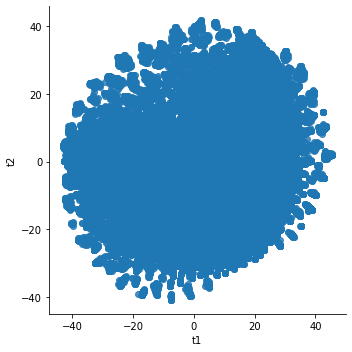

In [ ]:
"""Primera visualización de la data completa sin etiquetas de palabras"""
sns.lmplot(data=df[['t1','t2']],x='t1',y='t2',fit_reg=False)

In [ ]:
df.columns

Index(['Unnamed: 0', 'dim_1', 'dim_2', 'dim_3', 'dim_4', 'dim_5', 'dim_6',
       'dim_7', 'dim_8', 'dim_9',
       ...
       'dim_43_mm', 'dim_44_mm', 'dim_45_mm', 'dim_46_mm', 'dim_47_mm',
       'dim_48_mm', 'dim_49_mm', 'dim_50_mm', 't1', 't2'],
      dtype='object', length=155)

In [ ]:
import plotly.express as px

In [ ]:
df_sample

,Unnamed: 0,t1,t2
5733,di,-3.318219,0.817849
38963,masochistically,43.284054,1.380122
91212,subiaco,-19.492418,-4.695682
14810,jettison,35.658554,3.234236
96013,pz,-15.138150,25.448318
...,...,...,...
26357,microbe,-14.988149,21.034897
85946,scriptsome,16.172306,10.139194
37031,kremlin,13.941623,38.979916
11344,aggravate,-22.581032,28.200844


In [ ]:
"""Visualización generada con el T-SNE de la muestra aleatoria con etiquetas de palabras"""

fig = px.scatter(df_sample,x = df_sample["t1"], y = df_sample["t2"], hover_name='Unnamed: 0')

fig.show()

##### 6.- Construir un conjunto de prueba con 20 comentarios, 10 de su serie favorita y 10 de su película favorita tomados de la página oficial de IMBD https://www.imdb.com/ y/o de comentarios propios. Aplique el modelo final al conjunto de prueba. Agregue observaciones de los resultados obtenidos y conclusiones. (5pts)

# Pronostico

In [ ]:
"""Llamamos al modelo ganador"""

from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/modelo_ganador.h5")

In [ ]:
"""Funciones de preprocesamiento"""

from string import punctuation
import re

def ruido(text):
  clean_review=re.sub(r"<.*?>", " ", text)
  return clean_review

def lematizacion(text):
    doc=nlp(text)
    word_text=[word.lemma_ for word in doc]
    cleaned_text=" ".join(word_text)
    return cleaned_text
  
def puntuaciones(text):
  clean_review = " ".join(text.split())
  clean_review = re.sub(f"[{re.escape(punctuation)}]", "", clean_review)
  return clean_review

def minusculas(text):
  clean_text = re.sub(r"\b[0-9]+\b\s*", "", text) #Quitamos los numeros
  clean_text=clean_text.lower() #Volvemos todas las letras a minusculas
  return clean_text

def remocion_stop(text):
    word_text=text.split() #Separamos las palabras en elementos de una lista
    word_text=[word for word in word_text if word not in stopwords]   #Removemos los stopwords
      
    cleaned_text=" ".join(word_text)
    return cleaned_text

In [ ]:
"""Importamos los nuevos comentarios"""

df_nuevo = pd.read_csv("/content/drive/MyDrive/Diplomado/Modulo4/Practicas/Practica2/Reseñas Nuevas 20.xlsx - Hoja1.csv")

df_nuevo.head(5)

,review,sentiment
0,It was very enjoyable to watch in the cinema. ...,positive
1,It's amazing how well this film captured the e...,positive
2,"I can't even with this film! Such a family, be...",positive
3,The best X-men movies and the little girl char...,positive
4,I get why the numerous nominations and I get w...,positive


In [ ]:
"""Codificamos la variable objetivo"""
dic_target = {"positive":1,"negative":0}
df_nuevo["sentiment"] = df_nuevo["sentiment"].map(dic_target)
df_nuevo["sentiment"].value_counts(dropna=False)

1    10
0    10
Name: sentiment, dtype: int64

In [ ]:
X_test = df_nuevo["review"]
labels = np.array(df_nuevo["sentiment"])

In [ ]:
X_test

0     It was very enjoyable to watch in the cinema. ...
1     It's amazing how well this film captured the e...
2     I can't even with this film! Such a family, be...
3     The best X-men movies and the little girl char...
4     I get why the numerous nominations and I get w...
5     You won't find a single shallow depth of field...
6     Seasons 1-3 and the 2nd half of season 4 are t...
7     First things first - the characters, brought t...
8     Maybe it isn't real 100 percent history. Some ...
9     This feedback is currently based on the first ...
10    This movie was so disappointing. Such a cool c...
11    Season 7 is a disappointing series finale. It ...
12    Poor content, poor backdrops, scenes without a...
13    The movie manufactures ALL of its drama by wit...
14    No surprises this was awful. Jared Leto is ter...
15    I saw this in the theater with my 6 year old. ...
16    I think this movie fails in alot of aspects to...
17    I was disappointed. We expected more from 

In [ ]:
"""Aplicamos la limpieza"""
X_test=X_test.apply(ruido)
X_test=X_test.apply(lematizacion)
X_test=X_test.apply(puntuaciones)
X_test=X_test.apply(minusculas)
X_test=X_test.apply(remocion_stop)
X_test

0     enjoyable watch cinema expect theory turn true...
1     amazing film capture essence millennial brand ...
2     film family beautiful plot actor good mood mov...
3     good x man movie little girl character excelle...
4     numerous nomination people disappoint lack sto...
5     find single shallow depth field shoot film ins...
6     season 2nd half season good offer rest easily ...
7     thing character bring life brilliant performan...
8     maybe real percent history liberty ring true t...
9     feedback currently base episode season watch s...
10    movie disappointing cool concept message deliv...
11    season disappointing series finale rush boring...
12    poor content poor backdrop scene meaning predi...
13    movie manufacture drama withhold information c...
14    surprise awful jared leto terrible matt smith ...
15    theater year old fall asleep boring nonsensica...
16    think movie fail alot aspect child movie dull ...
17    disappointed expect movie storyline okay c

In [ ]:
"""Creamos el padded de los comentarios de validación"""
# Se definen comentarios adicionales sobre los que se requiere predecir
new_reviews  = list(X_test)

# Se convierten a una secuencias
sequences = tokenizer.texts_to_sequences(new_reviews)

# Se rellenan las secuencias
new_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type)
new_padded

array([[ 522,    9,  251, ...,    0,    0,    0],
       [ 321,    3,  500, ...,    0,    0,    0],
       [   3,   85,  153, ...,    0,    0,    0],
       ...,
       [ 968,  114,    2, ...,    0,    0,    0],
       [2094, 1335, 5017, ...,    0,    0,    0],
       [ 547,  220,   19, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix


def val(): 
  print( " Roc Validate: %.3f" %roc_auc_score(y_score=predictions,y_true=labels))
  print( " Acc Validate: %.3f" %accuracy_score(y_pred=predictions,y_true=labels))
  print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=predictions,y_true=labels))

In [ ]:
"""Pronostico de datos"""
predictions = model.predict(new_padded)
predictions = np.where(predictions>0.5, 1, 0).reshape(-1)
val()

 Roc Validate: 0.500
 Acc Validate: 0.500
 Matrix Conf Validate:  
 [[ 0 10]
 [ 0 10]]


Podemos apreciar que mantiene lo visto en la fase de entrenamiento donde intenta adivinar el sentimiento del comentario clasificando todos como positivos

# Conclusiones 

* Se pudo apreciar que el modelo no logró reconocer los patrones del entrenamiento. De lo cual no se fue capaz de corregir la causa para mejorar el accuracy.

* Se tienen distintas hipotesis del porque el performance del modelo no es buena como puede ser falta de dimensiones en el word embeddings, una contrucción de una arquitectura más robusta en la red o volver a tratar con la limpieza del texto aunque se trato de limpiar con el feedback que tenia el equipo.

* Se puede concluir que nuestro modelo es malo y no puede predecir el sentimiento de los comentarios dados.